In [2]:
import pandas as pd

movies = pd.read_csv('fandango_score_comparison.csv')
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


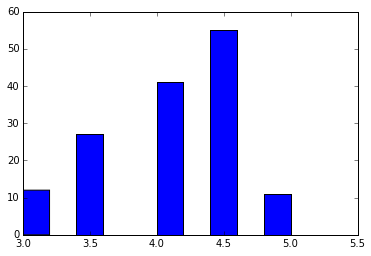

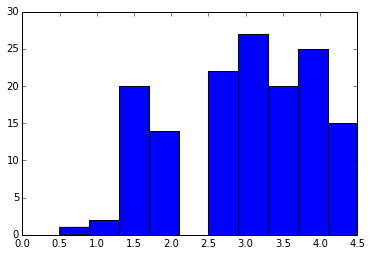

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies['Fandango_Stars'])
plt.show()

plt.hist(movies['Metacritic_norm_round'])
plt.show()

It looks like Fandango rates the movies higher than Metacritic.

In [4]:
fandango_mean = movies['Fandango_Stars'].mean()
metacritic_mean = movies['Metacritic_norm_round'].mean()
print(fandango_mean)
print(metacritic_mean)

4.08904109589
2.97260273973


In [5]:
fandango_median = movies['Fandango_Stars'].median()
metacritic_median = movies['Metacritic_norm_round'].median()
print(fandango_median)
print(metacritic_median)

4.0
3.0


In [6]:
import numpy as np

fandango_sd = np.std(movies['Fandango_Stars'])
metacritic_sd = np.std(movies['Metacritic_norm_round'])
print(fandango_sd)
print(metacritic_sd)

0.53853216127
0.987561029704


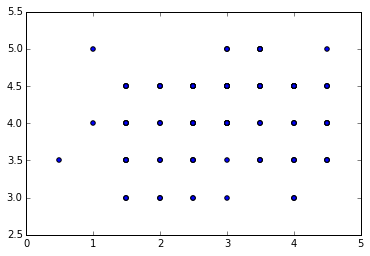

In [7]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.show()

In [8]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']
movies['fm_diff'] = np.absolute(movies['fm_diff'])
movies['fm_diff']

0      1.5
1      1.5
2      2.0
3      4.0
4      2.0
5      2.0
6      1.5
7      0.0
8      0.5
9      0.5
10     1.0
11     1.0
12     0.5
13     1.5
14     1.5
15     3.0
16     2.0
17     2.0
18     2.0
19     3.0
20     2.0
21     2.0
22     1.5
23     1.5
24     0.5
25     0.5
26     0.5
27     1.0
28     0.5
29     0.5
      ... 
116    0.5
117    0.0
118    1.0
119    1.0
120    0.5
121    0.5
122    0.5
123    1.5
124    1.5
125    2.5
126    2.0
127    1.5
128    0.5
129    0.0
130    1.5
131    1.0
132    2.0
133    3.0
134    3.0
135    1.5
136    1.0
137    1.0
138    2.0
139    1.0
140    0.0
141    0.5
142    0.5
143    1.0
144    1.0
145    0.0
Name: fm_diff, dtype: float64

In [9]:
movies = movies.sort_values('fm_diff', ascending=False)
movies.head(5)['FILM']

3       Do You Believe? (2015)
85           Little Boy (2015)
47                Annie (2014)
19               Pixels (2015)
134    The Longest Ride (2015)
Name: FILM, dtype: object

In [10]:
from scipy.stats import pearsonr

r_value, p = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
r_value

0.17844919073895918

The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [11]:
from scipy.stats import linregress

#linregress takes the parameters as (x, y)
#slope = cov(x,y)/variance(x)
#intercept = (mean(y) - slope*mean(x))
slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
slope, intercept, r_value

(0.09731107797392835, 3.7997739188994188, 0.17844919073895896)

In [12]:
y_3 = (slope * 3) + intercept
y_3

4.0917071528212041

In [14]:
y_4 = slope * 4 + intercept
y_4

4.1890182307951322

NameError: name 'y_3' is not defined

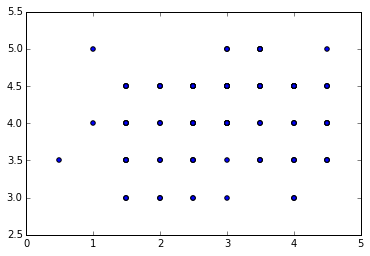

In [15]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([3,4], [y_3, y_4])
plt.show()